In [1]:
import pandas as pd 
import numpy as np

In [ ]:
# create date range
dates = pd.date_range(start="2021-01-01", end="2022-12-31", freq="D")

# simulate UK-style temperature (cold winters, mild summers)
temp = 10 + 8 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 1.5, len(dates))

# simulate UK gas demand (higher when temperature is lower)
demand = 3000 - 120 * temp + np.random.normal(0, 150, len(dates))

df = pd.DataFrame({
    "date": dates,
    "demand_gwh": demand,
    "mean_temp_c": temp
})

df.head()


,date,demand_gwh,mean_temp_c
0,2021-01-01,1796.316109,11.306823
1,2021-01-02,1699.980367,10.647691
2,2021-01-03,1258.942181,12.680196
3,2021-01-04,1721.386884,11.968642
4,2021-01-05,1633.951663,13.228335


In [5]:
# Heating Degree Days (UK standard baseline ~15.5°C)
df["hdd"] = (15.5 - df["mean_temp_c"]).clip(lower=0)

df.head()


,date,demand_gwh,mean_temp_c,hdd
0,2021-01-01,1796.316109,11.306823,4.193177
1,2021-01-02,1699.980367,10.647691,4.852309
2,2021-01-03,1258.942181,12.680196,2.819804
3,2021-01-04,1721.386884,11.968642,3.531358
4,2021-01-05,1633.951663,13.228335,2.271665


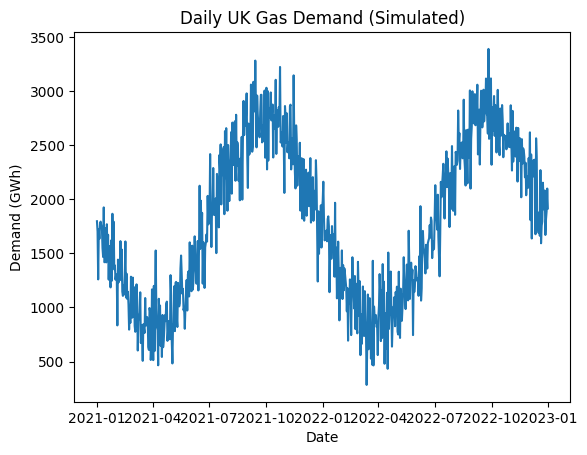

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["date"], df["demand_gwh"])
plt.title("Daily UK Gas Demand (Simulated)")
plt.xlabel("Date")
plt.ylabel("Demand (GWh)")
plt.show()


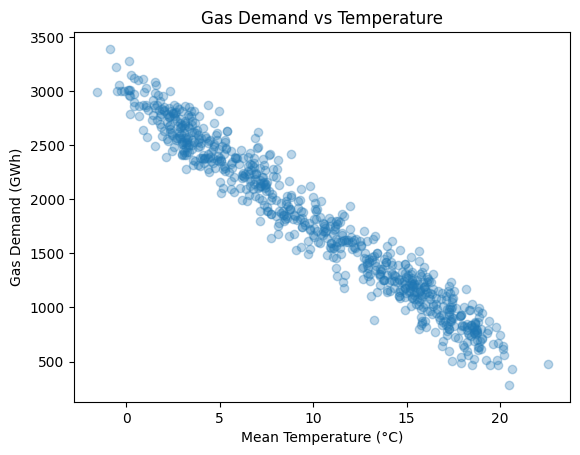

In [7]:
plt.figure()
plt.scatter(df["mean_temp_c"], df["demand_gwh"], alpha=0.3)
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Gas Demand (GWh)")
plt.title("Gas Demand vs Temperature")
plt.show()


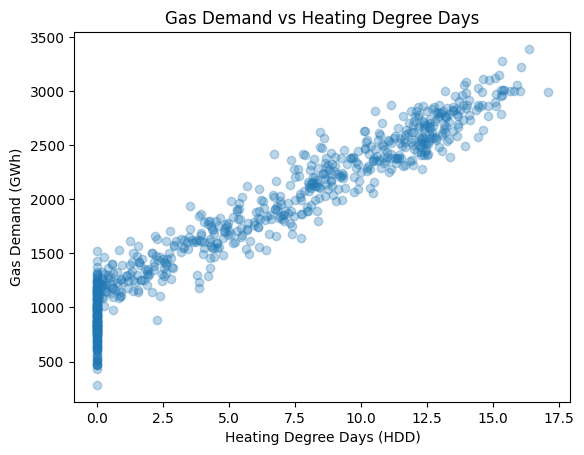

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["hdd"], df["demand_gwh"], alpha=0.3)
plt.xlabel("Heating Degree Days (HDD)")
plt.ylabel("Gas Demand (GWh)")
plt.title("Gas Demand vs Heating Degree Days")
plt.show()


In [9]:
df[["demand_gwh", "mean_temp_c", "hdd"]].corr()


,demand_gwh,mean_temp_c,hdd
demand_gwh,1.000000,-0.977112,0.964991
mean_temp_c,-0.977112,1.000000,-0.987177
hdd,0.964991,-0.987177,1.000000
